# Linear regression: health insurance cost

## Notebook setup

Handle imports of necessary modules up-front.

In [1]:
# Standard library imports
from pathlib import Path

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Custom functions for this notebook
import helper_functions as funcs

## 1. Data loading

### 1.1. Load

In [2]:
data_url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
data_df = pd.read_csv(data_url, sep=',')

### 1.2. Save local copy

In [3]:
# Make a directory for raw data
Path('../data/raw').mkdir(exist_ok=True, parents=True)

# Save a local copy of the raw data
data_df.to_parquet('../data/raw/medical-insurance-cost.parquet')

### 1.3. Inspect

In [4]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains information about 1,338 insurance policyholders with 7 features:
- **age**: Age of the policyholder (numerical)
- **sex**: Gender (categorical: male/female) 
- **bmi**: Body Mass Index (numerical)
- **children**: Number of children covered (numerical)
- **smoker**: Smoking status (categorical: yes/no)
- **region**: Geographic region (categorical: southeast, southwest, northeast, northwest)
- **charges**: Insurance charges - our target variable (numerical)

This is our target variable that we want to predict using the other features.

## 2. EDA

### 2.1. Data composition

#### 2.1.1. Interval features

In [ ]:
# Take a look at some descriptive statistics for the numerical features - what do you see?

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


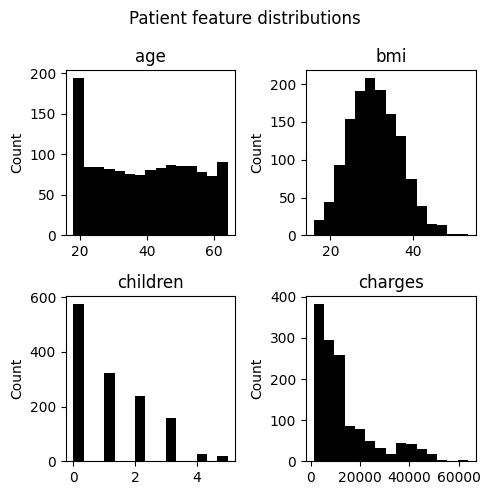

In [ ]:
# Plot the distributions of the numerical features - what do you see?

#### 2.1.2. Nominal features

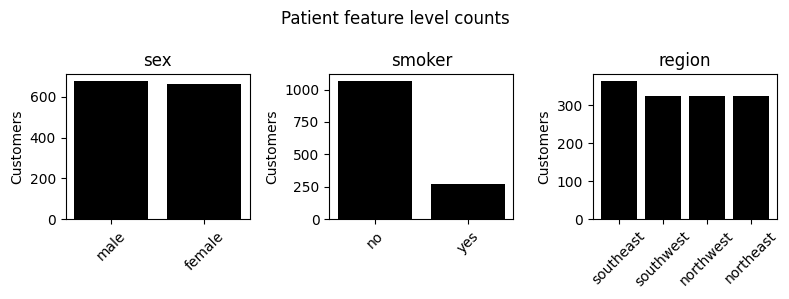

In [ ]:
# Plot the level counts of the categorical features - what do you see?

### 2.2. Feature interactions

#### 2.2.1. Interval features vs label

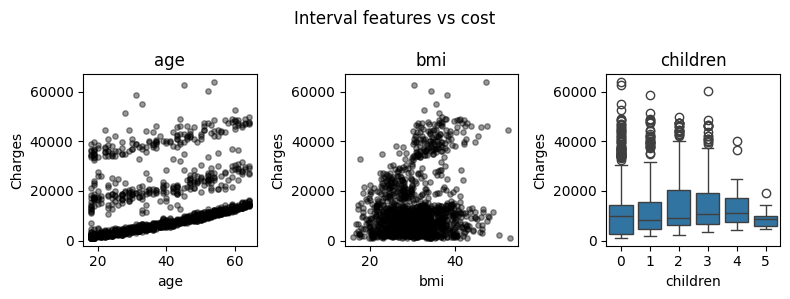

In [ ]:
# Plot the relationship between the numerical features and the target variable - what do you see?

#### 2.2.2. Nominal features vs label

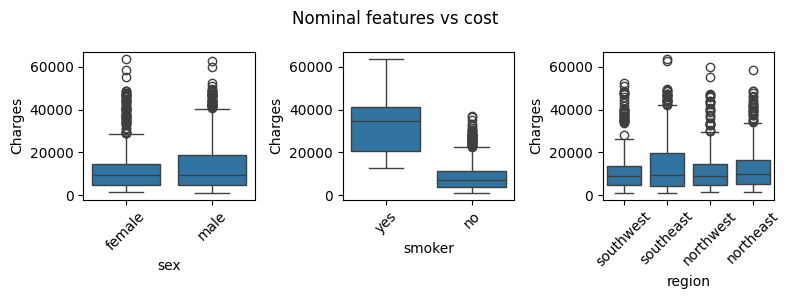

In [ ]:
# Plot the relationships between the categorical features and the target variable - what do you see?

## 3. Data preparation

### 3.1. Train-test split

In [ ]:
# Split the data into 80% train and 20% test sets

We split the data into 80% training (1,070 samples) and 20% testing (268 samples) to evaluate model performance on unseen data. This helps prevent overfitting and gives us a realistic estimate of how the model will perform in practice.

### 3.2. Feature encoding

In [ ]:
# Encode the categorical features using OneHotEncoder

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
26,63,23.085,0,14451.83515,0.0,0.0,0.0,0.0,0.0
313,49,35.860,0,8124.40840,1.0,0.0,0.0,1.0,0.0
178,46,28.900,2,8823.27900,0.0,0.0,0.0,0.0,1.0
639,56,33.660,4,12949.15540,1.0,0.0,0.0,1.0,0.0
125,26,28.785,0,3385.39915,0.0,0.0,0.0,0.0,0.0


We use one-hot encoding for categorical variables, which creates binary columns for each category. The `drop='first'` parameter prevents multicollinearity by dropping one category as a reference. 

Our dataset now has the following encoded features:
- Original: sex, smoker, region (3 categorical columns)  
- Encoded: sex_male, smoker_yes, region_northwest, region_southeast, region_southwest (5 binary columns)

This allows our linear model to properly handle categorical variables.

## 4. Model training

In [ ]:
# Dictionary to store the results
results = {
    'RMSE': {},
    'R2': {}
}

### 4.1. Baseline

In [ ]:
# Set a model baseline using a strategy that you devise - what is the 'easiest' 'prediction' you can make?

Mean cost model RMSE: $12476.46
Mean cost model R squared: $-0.00


Any useful model should significantly outperform this baseline.

### 4.2. Linear regression model

In [ ]:
# Train a default linear regression model on the training data

Testing data predictions RMSE: $6032.68
Testing data predictions R squared: 0.77


In [ ]:
# Calculate the RMSE and R² for the model on the test data

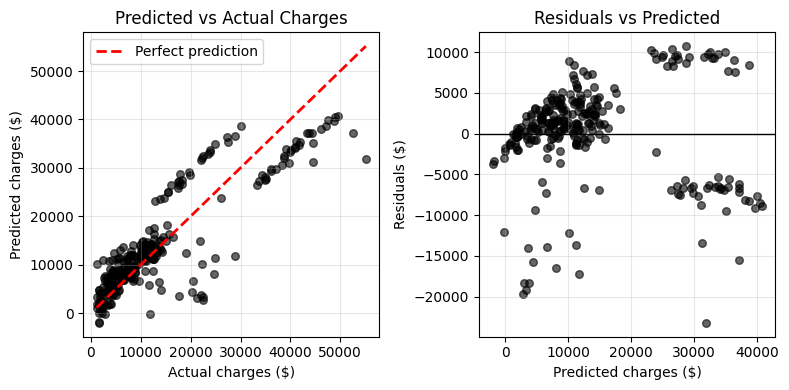

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Predicted vs Actual plot
axs[0].scatter(labels, predictions, color='black', alpha=0.6, s=30)
axs[0].plot([min(labels), max(labels)], [min(labels), max(labels)], 
            'r--', linewidth=2, label='Perfect prediction')
axs[0].set_xlabel('Actual charges ($)')
axs[0].set_ylabel('Predicted charges ($)')
axs[0].set_title(f'Predicted vs Actual Charges')
axs[0].legend()
axs[0].grid(alpha=0.3)

# Residuals plot
residuals = predictions - labels
axs[1].scatter(predictions, residuals, color='black', alpha=0.6, s=30)
axs[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axs[1].set_xlabel('Predicted charges ($)')
axs[1].set_ylabel('Residuals ($)')
axs[1].set_title(f'Residuals vs Predicted')
axs[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Predicted vs Actual Plot:**
- Points should lie on the red diagonal line for perfect predictions

**Residuals Plot:**
- Residuals should be randomly scattered around zero

## 5. Optimization

### 5.1. Feature transformations

In [ ]:
# Try to improve model performane by scaling the data with StandardScaler or MinMaxScaler, then re-training the model
# is there any improvement in the RMSE and R²? Why or why not?

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.375701,30.591449,1.107477,13192.356720,0.496262,0.199065,0.248598,0.267290,0.246729
std,14.057378,6.064950,1.235823,12016.707774,0.500220,0.399484,0.432402,0.442752,0.431309
min,18.000000,16.815000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.125000,0.000000,4748.057175,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.495000,1.000000,9369.615750,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.471250,2.000000,16584.318157,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,49.060000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2. Feature engineering

In [ ]:
# Devise a additional strategy to improve the model performance - what features can you engineer or transform?
# Try it out and see if it improves the RMSE and R². Did it work? Why or why not?

## 6. Results

### 6.1. Model comparison

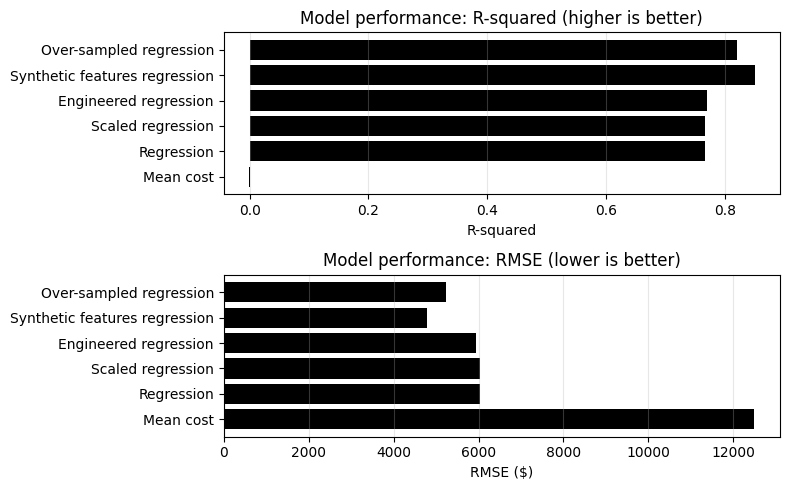

In [ ]:
# Plot the RMSE and R² results for each model

### 6.2. Winning model evaluation

In [ ]:
# Choose the best model based on RMSE and R² Evaluate it on the test data. Include plots of the predicted vs actual and residuals vs predicted